Number of Omega-automaton states (including the trap state): 3


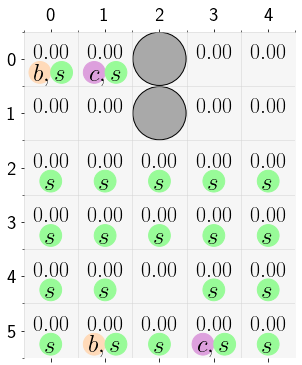

In [1]:
%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np

# Specification
ltl = 'F G s & G F b & G F c'
oa = OmegaAutomaton(ltl,oa_type='dra')
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

# MDP Description
shape = (6,5)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
    ['E',  'E',  'B',  'E',  'E'],
    ['E',  'E',  'B',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E']
])

label = np.array([
    [('b','s'), ('c','s'), (),     (),        ()],
    [(),        (),        (),     (),        ()],
    [('s',),    ('s',),    ('s',), ('s',),    ('s',)],
    [('s',),    ('s',),    ('s',), ('s',),    ('s',)],
    [('s',),    ('s',),    (),     ('s',),    ('s',)],
    [('s',),    ('b','s'), ('s',), ('c','s'), ('s',)]
],dtype=np.object)

reward = np.zeros(shape)

lcmap={
    'b':'peachpuff',
    'c':'plum',
    's':'palegreen'
}

grid_mdp = GridMDP(shape=shape,structure=structure,reward=reward,label=label,figsize=6,robust=True,lcmap=lcmap)  # Use figsize=4 for smaller figures
grid_mdp.plot()
# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)
ltl = 'FGs & GFb & GFc'

In [2]:
oa.__dict__

{'oa_type': 'dra',
 'q0': 0,
 'delta': [{(): 1,
   ('b',): 1,
   ('c',): 1,
   ('s',): 0,
   ('b', 'c'): 1,
   ('b', 's'): 0,
   ('c', 's'): 1,
   ('b', 'c', 's'): 1},
  {(): 1,
   ('b',): 1,
   ('c',): 1,
   ('s',): 1,
   ('b', 'c'): 1,
   ('b', 's'): 0,
   ('c', 's'): 1,
   ('b', 'c', 's'): 0},
  {(): 2,
   ('b',): 2,
   ('c',): 2,
   ('s',): 2,
   ('b', 'c'): 2,
   ('b', 's'): 2,
   ('c', 's'): 2,
   ('b', 'c', 's'): 2}],
 'acc': [{(): [False],
   ('b',): [False],
   ('c',): [False],
   ('s',): [None],
   ('b', 'c'): [False],
   ('b', 's'): [None],
   ('c', 's'): [True],
   ('b', 'c', 's'): [True]},
  {(): [False],
   ('b',): [False],
   ('c',): [False],
   ('s',): [None],
   ('b', 'c'): [False],
   ('b', 's'): [None],
   ('c', 's'): [None],
   ('b', 'c', 's'): [True]},
  {(): [None],
   ('b',): [None],
   ('c',): [None],
   ('s',): [None],
   ('b', 'c'): [None],
   ('b', 's'): [None],
   ('c', 's'): [None],
   ('b', 'c', 's'): [None]}],
 'shape': (1, 3),
 'spot_oa': None,
 'eps': [

In [3]:
# Q=csrl.minimax_q(T=2**7,K=2**12)
Q = np.load('Q.npy')
value = np.max(np.min(Q,axis=-1),axis=-1)
csrl.plot(value)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=2), …

In [4]:
policy = np.argmax(np.min(Q,axis=-1),axis=-1)
policy_ = np.take_along_axis(np.argmin(Q,axis=-1),np.expand_dims(policy,axis=-1),axis=-1).reshape(policy.shape)
csrl.plot(value=value,policy=policy,policy_=policy_)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=2), …

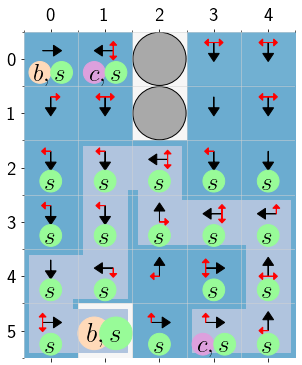

In [5]:
path = {
    (5,3) : 'r',
    (5,4) : 'lu',
    (4,4) : 'du',
    (3,4) : 'dl',
    (3,3) : 'rl',
    (3,2) : 'ru',
    (2,2) : 'dl',
    (2,1) : 'rd',
    (3,1) : 'ud',
    (4,1) : 'ul',
    (4,0) : 'rd',
    (5,0) : 'ur',
    (5,1) : 'l'
}
hidden=[(5,1)]
csrl.plot(value=value,policy=policy,policy_=policy_,iq=(0,0),path=path,hidden=hidden)

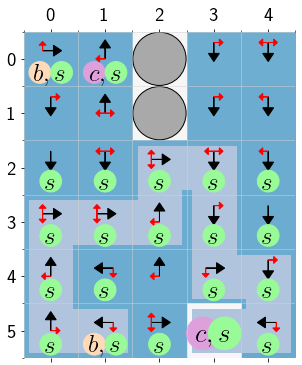

In [6]:
path = {
    (5,1) : 'l',
    (5,0) : 'ru',
    (4,0) : 'du',
    (3,0) : 'dr',
    (3,1) : 'lr',
    (3,2) : 'lu',
    (2,2) : 'dr',
    (2,3) : 'ld',
    (3,3) : 'ud',
    (4,3) : 'ur',
    (4,4) : 'ld',
    (5,4) : 'ul',
    (5,3) : 'r'
}
hidden=[(5,3)]
csrl.plot(value=value,policy=policy,policy_=policy_,iq=(0,1),path=path,hidden=hidden)